# Creating a dataset

- Has bias
- Has missing values

The purpose of the demonstration would be to handle them both. This is a simulation.


In [23]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Create a random seed for reproducibility
np.random.seed(42)

# Generate sample data for the e-commerce dataset
n_samples = 1000

customer_ids = np.random.randint(1001, 1101, size=n_samples)
timestamps = pd.date_range(start='2023-01-01', periods=n_samples, freq='D')
product_ids = np.random.randint(1, 21, size=n_samples)
categories = np.random.choice(['Electronics', 'Clothing', 'Home', 'Books'], size=n_samples)
prices = np.random.uniform(10, 500, size=n_samples)
quantities = np.random.randint(1, 6, size=n_samples)
actions = np.random.choice(['Purchase', 'View', 'Add to Cart'], size=n_samples)

# Introduce missing values for Price and Category
missing_indices = np.random.choice(n_samples, size=int(n_samples * 0.1), replace=False)
prices[missing_indices] = np.nan
categories[missing_indices] = np.nan

# Introduce bias by making 'Electronics' products more likely to be purchased
bias_indices = np.where(categories == 'Electronics')[0]
actions[bias_indices] = 'Purchase'

# Create the DataFrame
ecommerce_data = pd.DataFrame({
    'CustomerID': customer_ids,
    'Timestamp': timestamps,
    'ProductID': product_ids,
    'Category': categories,
    'Price': prices,
    'Quantity': quantities,
    'Action': actions
})

# Check data
ecommerce_data.head()

,CustomerID,Timestamp,ProductID,Category,Price,Quantity,Action
0,1052,2023-01-01,2,Clothing,125.570224,2,Add to Cart
1,1093,2023-01-02,15,Clothing,191.996781,3,Add to Cart
2,1015,2023-01-03,8,Clothing,40.645691,1,Add to Cart
3,1072,2023-01-04,8,nan,NaN,2,View
4,1061,2023-01-05,17,nan,NaN,5,Purchase


In [5]:
# Save the DataFrame to a CSV file
ecommerce_data.to_csv('ecommerce_data.csv', index=False)

---

# Data Handling

### Load the dataset using pandas

In [6]:
ecommerce_data = pd.read_csv('ecommerce_data.csv')
ecommerce_data.head()

,CustomerID,Timestamp,ProductID,Category,Price,Quantity,Action
0,1052,2023-01-01,2,Clothing,125.570224,2,Add to Cart
1,1093,2023-01-02,15,Clothing,191.996781,3,Add to Cart
2,1015,2023-01-03,8,Clothing,40.645691,1,Add to Cart
3,1072,2023-01-04,8,NaN,NaN,2,View
4,1061,2023-01-05,17,NaN,NaN,5,Purchase


### Handling Missing Data

- Dropping Data
- Imputing (averaging them)

In [7]:
# Identify missing values
missing_values = ecommerce_data.isnull().sum()

# Display the missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
CustomerID      0
Timestamp       0
ProductID       0
Category      100
Price         100
Quantity        0
Action          0
dtype: int64


In [13]:
# Dropping rows with missing CustomerID
cleaned_data = ecommerce_data.dropna(subset=['CustomerID'])

# Fill missing Category values with the most common category
most_common_category = cleaned_data['Category'].mode()[0]
cleaned_data['Category'].fillna(most_common_category, inplace=True)

# Impute missing Price values with the mean
mean_imputed_data = cleaned_data.copy()
mean_imputed_data['Price'].fillna(cleaned_data['Price'].mean(), inplace=True)
cleaned_data = mean_imputed_data

In [14]:
# Check if missing data has been handled
missing_values = cleaned_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
CustomerID    0
Timestamp     0
ProductID     0
Category      0
Price         0
Quantity      0
Action        0
dtype: int64


### Part 2: Analyzing Features

In [15]:
# Calculate basic statistics for the cleaned data
statistics_cleaned = cleaned_data.describe()

# Display the statistics
print("\nBasic Statistics for Cleaned Data:")
print(statistics_cleaned)


Basic Statistics for Cleaned Data:
        CustomerID    ProductID        Price     Quantity
count  1000.000000  1000.000000  1000.000000  1000.000000
mean   1050.128000    10.338000   257.705579     2.975000
std      29.573505     5.771921   136.893133     1.414346
min    1001.000000     1.000000    10.092316     1.000000
25%    1024.000000     5.000000   143.066034     2.000000
50%    1051.000000    10.000000   257.705579     3.000000
75%    1075.000000    15.000000   371.234787     4.000000
max    1100.000000    20.000000   499.859764     5.000000



Total Revenue by Category:
Category
Books          59240.779861
Clothing       84692.447935
Electronics    61269.584634
Home           52502.766891
Name: Price, dtype: float64


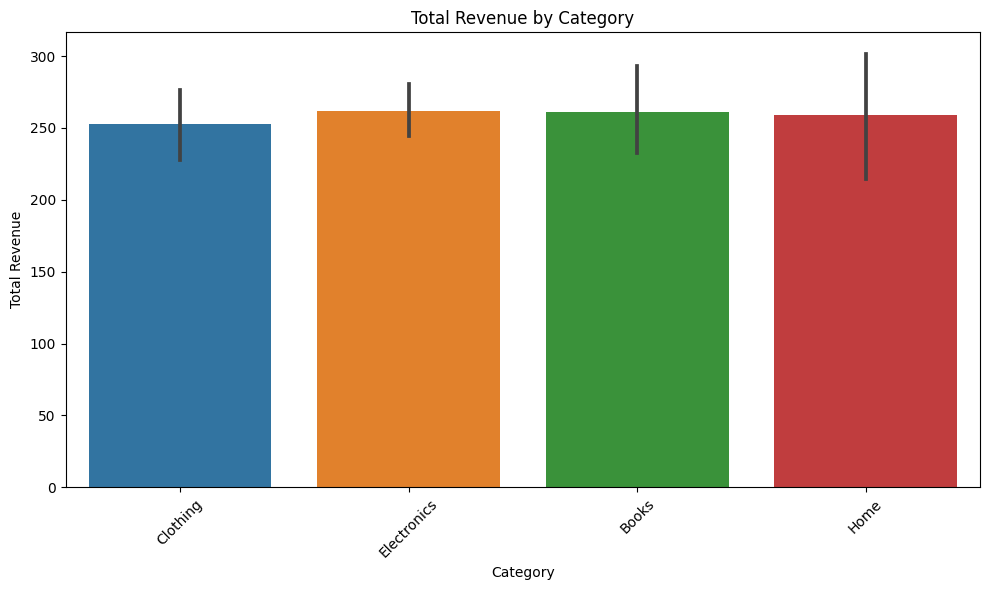

In [20]:
# Calculate total revenue for each category
category_revenue = cleaned_data.groupby('Category')['Price'].sum()

# Display total revenue per category
print("\nTotal Revenue by Category:")
print(category_revenue)

# Visualize the distribution of purchases by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Price', data=cleaned_data[cleaned_data['Action'] == 'Purchase'])
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Action Distribution by Category:
Action       Add to Cart  Purchase  View
Category                                
Books                 75        76    74
Clothing             125        96   118
Electronics            0       234     0
Home                  71        60    71


<Figure size 1000x600 with 0 Axes>

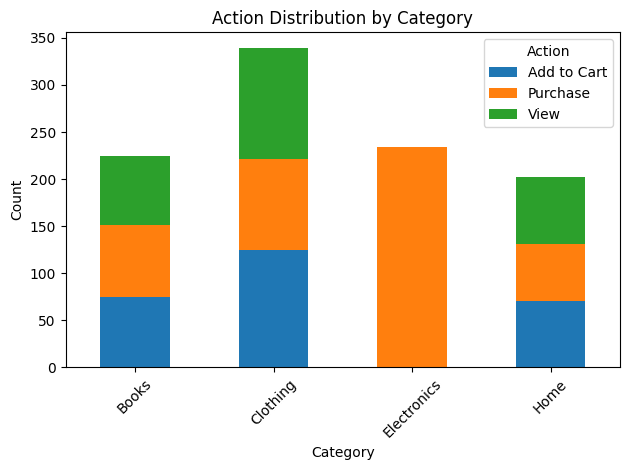

In [21]:
# Calculate the distribution of actions by category
action_distribution = pd.crosstab(index=cleaned_data['Category'], columns=cleaned_data['Action'])

# Display the distribution of actions by category
print("\nAction Distribution by Category:")
print(action_distribution)

# Visualize the distribution of actions by category (stacked bar plot)
plt.figure(figsize=(10, 6))
action_distribution.plot(kind='bar', stacked=True)
plt.title('Action Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Action')
plt.show()

### Dataset Splitting

In [24]:
# Split the cleaned dataset into training and testing sets (80% training, 20% testing)
train_data, test_data = train_test_split(cleaned_data, test_size=0.2, random_state=42)

# Calculate sizes of the resulting sets
train_size = len(train_data)
test_size = len(test_data)

print("\nDataset Splitting:")
print(f"Training set size: {train_size}")
print(f"Testing set size: {test_size}")


Dataset Splitting:
Training set size: 800
Testing set size: 200


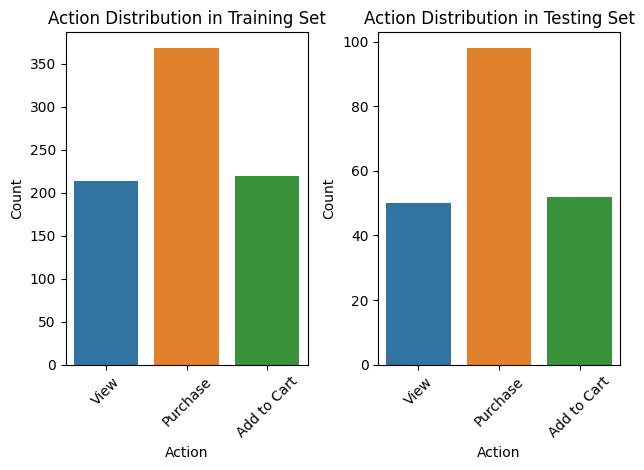

In [26]:
# Create subplots for the training and testing sets
# To ensure the sets are properly balanced
plt.subplot(1, 2, 1)
sns.countplot(data=train_data, x='Action')
plt.title('Action Distribution in Training Set')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=test_data, x='Action')
plt.title('Action Distribution in Testing Set')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()